In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
#preprocessing

lnames = ['movie_id','imdb_id','tmdb_id']
links = pd.read_csv('ml-latest-small/links.csv', sep=',', header=None, names=lnames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-latest-small/ratings.csv', sep=',', header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('ml-latest-small/movies.csv', sep=',', header=None, names=mnames)

In [3]:
data = pd.merge(pd.merge(movies, ratings), links)
data = data.drop([0])#first row is labels
data[:5]

,movie_id,title,genres,user_id,rating,timestamp,imdb_id,tmdb_id
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,0114709,862
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,0114709,862
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,0114709,862
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,0114709,862
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,0114709,862


In [4]:
#Each movie average rating
data['rating'] = data['rating'].astype(float)
data['timestamp'] = data['timestamp'].astype(int)
mean_ratings = data.pivot_table(values='rating', index='title', aggfunc='mean')
mean_ratings

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [5]:
#Highest rated movies
top_movies = mean_ratings.sort_values(['rating'], ascending=False)
top_movies[:10]

,rating
title,
Gena the Crocodile (1969),5.0
True Stories (1986),5.0
Cosmic Scrat-tastrophe (2015),5.0
Love and Pigeons (1985),5.0
Red Sorghum (Hong gao liang) (1987),5.0
"Thin Line Between Love and Hate, A (1996)",5.0
Lesson Faust (1994),5.0
Eva (2011),5.0
Who Killed Chea Vichea? (2010),5.0


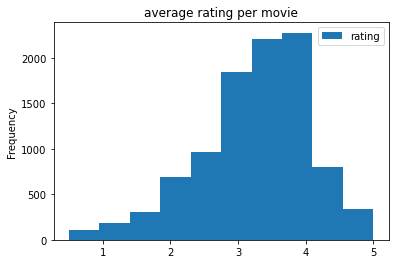

In [86]:
top_movies.plot(kind='hist', bins=10, title='average rating per movie')

In [8]:
#removing outliers 
ratings_by_title = data.groupby('movie_id').size()
ratings_by_title = pd.DataFrame(ratings_by_title, columns = ['n_ratings'])
ratings_by_title = pd.merge(ratings_by_title, movies, on='movie_id')
ratings_by_title = ratings_by_title.drop(columns=['genres'])
ratings_by_title = ratings_by_title.set_index('title')
ratings_by_title['n_ratings'] = ratings_by_title['n_ratings'].astype(int)
ratings_by_title

,movie_id,n_ratings
title,,
Toy Story (1995),1,215
GoldenEye (1995),10,132
City Hall (1996),100,14
Human Planet (2011),100044,1
Comme un chef (2012),100068,1
...,...,...
Codependent Lesbian Space Alien Seeks Same (2011),99853,1
2 Days in the Valley (1996),999,12
"Last Stand, The (2013)",99910,2


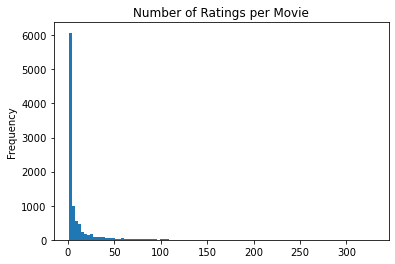

In [94]:
ratings_by_title['n_ratings'].plot(kind='hist', bins = 100, title='Number of Ratings per Movie')

In [10]:
#titles with atleast 10% of the number of ratings as the most rated movie
min_ratings = max(ratings_by_title['n_ratings'])*0.1
min_ratings = int(min_ratings)
print("minimum number of ratings: "+str(min_ratings))
active_titles = ratings_by_title.index[ratings_by_title['n_ratings'] > min_ratings]
active_titles

minimum number of ratings: 32


Index(['Toy Story (1995)', 'GoldenEye (1995)', 'Cool Runnings (1993)',
       'Cinderella (1950)', 'Mary Poppins (1964)', 'Dumbo (1941)',
       'Alice in Wonderland (1951)', 'Sound of Music, The (1965)',
       'Die Hard (1988)', 'Happy Gilmore (1996)',
       ...
       'Gone with the Wind (1939)', 'Intouchables (2011)',
       'Citizen Kane (1941)', '2001: A Space Odyssey (1968)',
       'Broken Arrow (1996)', 'It's a Wonderful Life (1946)', 'Skyfall (2012)',
       'African Queen, The (1951)',
       'Hobbit: An Unexpected Journey, The (2012)', 'Django Unchained (2012)'],
      dtype='object', name='title', length=806)

In [13]:
#Highest rated movies with enough ratings to qualify
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings = mean_ratings.sort_values(by='rating', ascending=False)
mean_ratings

,rating
title,
"Shawshank Redemption, The (1994)",4.429022
Lawrence of Arabia (1962),4.300000
"Godfather, The (1972)",4.289062
Fight Club (1999),4.272936
Cool Hand Luke (1967),4.271930
...,...
"Flintstones, The (1994)",2.357143
Hollow Man (2000),2.294872
Batman & Robin (1997),2.214286


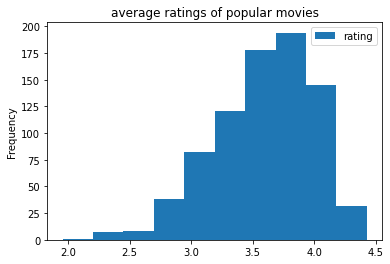

In [84]:
mean_ratings.plot(kind='hist', bins=10, title='average ratings of popular movies')

In [87]:
ratings_per_user = data.groupby('user_id').size()
ratings_per_user = ratings_per_user.sort_values()
ratings_per_user

user_id
442      20
406      20
147      20
194      20
569      20
       ... 
274    1346
448    1864
474    2108
599    2478
414    2698
Length: 610, dtype: int64

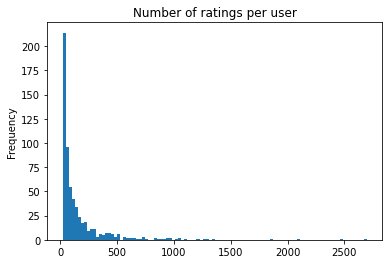

In [83]:
ratings_per_user.plot(kind = 'hist', bins=100, title='Number of ratings per user')

In [15]:
#Data Encoding: each user and their movie ratings
data['user_id'] = data['user_id'].astype(str).astype(int)
sorted_by_user = data.sort_values(by = 'user_id')
sorted_by_user

,movie_id,title,genres,user_id,rating,timestamp,imdb_id,tmdb_id
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,0114709,862
35549,1777,"Wedding Singer, The (1998)",Comedy|Romance,1,4.0,964981230,0120888,11003
35250,1732,"Big Lebowski, The (1998)",Comedy|Crime,1,5.0,964981125,0118715,115
34349,1676,Starship Troopers (1997),Action|Sci-Fi,1,3.0,964982620,0120201,563
2380,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931,0114814,629
...,...,...,...,...,...,...,...,...
71057,6387,Once a Thief (Zong heng si hai) (1991),Action|Comedy|Crime|Thriller,610,3.5,1479542038,0101020,47423
87455,59915,Stuck (2007),Horror|Thriller,610,3.5,1493848708,0758786,13848
97037,111663,Zombeavers (2014),Action|Comedy|Horror,610,3.5,1493848822,2784512,254474
98182,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,610,4.5,1479544589,2488496,140607


In [74]:
n_users = data.user_id.unique().shape[0]
print(n_users, ' users')
n_movies = data.title.unique().shape[0]
print(int(n_movies*0.2))
print(n_movies, 'movies')
ratings_matrix = sorted_by_user.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
ratings_matrix

610  users
1943
9719 movies


movie_id,1,10,100,100044,100068,100083,100106,100159,100163,100194,...,99750,99764,998,99813,99846,99853,999,99910,99917,99992
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,2.5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
R = np.array(ratings_matrix)
sparsity = float(len(R.nonzero()[0]))
sparsity /= np.product(R.shape)
sparsity *= 100
print('Sparsity: {:.2f}%'.format(sparsity))

Sparsity: 1.70%


In [75]:
#Train and test matrix fact. adapted from towardsdatascience
def train_test_split(ratings):
    
    validation = np.zeros(ratings.shape)
    train = ratings.copy()
    
    for user in np.arange(ratings.shape[0]):
        if len(ratings[user,:].nonzero()[0]) > 0:#every user that has rated a movie
            val_ratings = np.random.choice(
                ratings[user, :].nonzero()[0], 
                size=5,#change %25 
                replace=False
            )
            train[user, val_ratings] = 0
            validation[user, val_ratings] = ratings[user, val_ratings]
    return train, validation

In [76]:
train, val = train_test_split(R)

train

array([[4. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 4. , 0. , ..., 0. , 0. , 0. ],
       [3. , 4. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 3. , 0. ]])

In [20]:
def rmse(prediction, actual_rating):
    prediction = prediction[actual_rating.nonzero()].flatten() 
    actual_rating = actual_rating[actual_rating.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, actual_rating))

In [88]:
def predict(X_train, X_val, n_iters=200, n_latent_features=2, lmbda=0.1, learning_rate=0.001):
    m, n = X_train.shape

    P = 3 * np.random.rand(n_latent_features, m)
    Q = 3 * np.random.rand(n_latent_features, n)
    
    train_error = []
    val_error = []

    users, movies = X_train.nonzero()
    
    for epoch in range(n_iters):
        for u, i in zip(users, movies):
            error = X_train[u, i] -  np.dot(P[:,u],  Q[:,i])
            P[:, u] +=  learning_rate * (error *  Q[:, i] -  lmbda *  P[:, u])
            Q[:, i] +=  learning_rate * (error *  P[:, u] -  lmbda *  Q[:, i])

        train_rmse = rmse(np.dot(P.T, Q), X_train)
        val_rmse = rmse(np.dot(P.T, Q), X_val)
        train_error.append(train_rmse)
        val_error.append(val_rmse)
        
    return np.dot(P.T, Q) , train_error, val_error

In [89]:
prediction, t_err, v_err = predict(train, val)

prediction.shape

(610, 9724)

In [90]:
err = rmse(np.array(prediction), R)
print(err)

0.8280733085667744


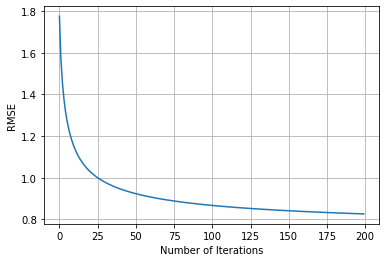

In [91]:
plt.plot(range(200), t_err)
plt.xlabel('Number of Iterations');
plt.ylabel('RMSE')
plt.grid()
plt.show()

In [102]:
prediction = pd.DataFrame(data = prediction, index = ratings_matrix.index, columns =ratings_matrix.columns)

prediction

movie_id,1,10,100,100044,100068,100083,100106,100159,100163,100194,...,99750,99764,998,99813,99846,99853,999,99910,99917,99992
user_id,,,,,,,,,,,,,,,,,,,,,
1,4.564265,4.050417,3.430603,5.186594,6.234925,3.833534,3.323980,4.257968,3.809575,4.424371,...,4.671697,5.184270,3.536199,4.995751,2.317840,4.678078,3.800743,2.934849,4.217924,4.384344
2,3.684993,3.329233,2.959579,3.918759,4.963783,3.069841,2.472392,3.444102,2.924685,3.140066,...,3.955694,4.704423,3.077836,4.022454,1.764489,4.260294,3.034161,2.493226,3.617883,3.366027
3,2.473619,2.428549,2.609063,1.749760,3.102458,1.978105,0.967121,2.332899,1.468227,0.691693,...,3.258410,4.858883,2.796638,2.664409,0.834213,4.444537,1.923975,2.079320,3.125230,1.690063
4,3.555265,3.170305,2.721349,3.970487,4.838477,2.979554,2.534494,3.318336,2.928332,3.334503,...,3.686556,4.172486,2.812143,3.888542,1.777798,3.769021,2.951629,2.318082,3.340484,3.370164
5,3.714661,3.365572,3.014036,3.906964,4.992449,3.090493,2.458217,3.472864,2.923871,3.095656,...,4.017221,4.826007,3.138570,4.053081,1.761460,4.372583,3.053040,2.533265,3.681296,3.365104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,3.743898,3.325460,2.823804,4.240493,5.110661,3.143205,2.715626,3.492984,3.117053,3.606834,...,3.841523,4.279267,2.912125,4.097266,1.895720,3.862225,3.115832,2.413740,3.470784,3.587342
607,4.002718,3.570646,3.068147,4.464116,5.445845,3.353980,2.848694,3.736115,3.293463,3.744392,...,4.154698,4.709367,3.171114,4.377694,1.999127,4.254321,3.322332,2.612630,3.765716,3.790389
608,3.586869,3.212866,2.791731,3.940417,4.864451,2.999912,2.505630,3.349391,2.917626,3.259048,...,3.764084,4.335812,2.891361,3.920458,1.767610,3.920135,2.969500,2.368797,3.421881,3.357863


In [103]:
#highest rated predictions
highest_prediction = prediction.mean(axis=0)
highest_prediction = pd.DataFrame(data = highest_prediction,index = ratings_matrix.columns, columns = ['predicted_rating'])
highest_prediction = pd.merge(highest_prediction, movies, on='movie_id')
highest_prediction = highest_prediction.set_index(['title'])
highest_prediction = highest_prediction.sort_values(by = 'predicted_rating', ascending = False)
highest_prediction

,movie_id,predicted_rating,genres
title,,,
Crossing Delancey (1988),4495,6.541591,Comedy|Romance
The Adventures of Sherlock Holmes and Doctor Watson,147250,6.431929,(no genres listed)
Hotel Chevalier (Part 1 of 'The Darjeeling Limited') (2007),108192,6.233499,Drama
Scooby-Doo! Abracadabra-Doo (2010),118894,6.189783,Animation|Children|Mystery
Northanger Abbey (2007),89678,6.157838,Drama|Romance
...,...,...,...
Surf Nazis Must Die (1987),2164,0.659611,Action|Comedy|Drama|Horror
Body of Evidence (1993),5962,0.628651,Drama|Thriller
Zeus and Roxanne (1997),1426,0.576319,Children


In [104]:
highest_prediction = highest_prediction.drop(columns = ['genres'])
highest_prediction = highest_prediction.loc[active_titles]
#highest_prediction = highest_prediction.sort_values(by = 'predicted_rating', ascending = False)
highest_prediction[:10]

,movie_id,predicted_rating
title,,
Toy Story (1995),1,3.800675
GoldenEye (1995),10,3.369027
Cool Runnings (1993),1020,3.167828
Cinderella (1950),1022,3.472547
Mary Poppins (1964),1028,3.908197
Dumbo (1941),1029,3.413173
Alice in Wonderland (1951),1032,3.467367
"Sound of Music, The (1965)",1035,3.918611
Die Hard (1988),1036,3.834528


In [97]:
#comparing to original data
ratings_comparison = mean_ratings.merge(highest_prediction, on='title', how='left')
ratings_comparison['%_diff'] = ((ratings_comparison['rating'] - ratings_comparison['predicted_rating'])/ratings_comparison['rating'])*100
ratings_comparison = ratings_comparison[['movie_id', 'rating','predicted_rating','%_diff']]
ratings_comparison = ratings_comparison.sort_values(by='%_diff', ascending=True)
ratings_comparison[:15]

,movie_id,rating,predicted_rating,%_diff
title,,,,
Akira (1988),1274,3.743590,3.954535,-5.634840
Hollow Man (2000),3826,2.294872,2.408634,-4.957228
Annie Hall (1977),1230,3.870690,4.047655,-4.571939
Willow (1988),2193,3.337500,3.487456,-4.493050
Road Trip (2000),3617,3.085366,3.214412,-4.182538
Napoleon Dynamite (2004),8376,3.324324,3.463319,-4.181148
Hulk (2003),6534,2.560606,2.664997,-4.076793
"Goonies, The (1985)",2005,3.570175,3.715654,-4.074830
Boys Don't Cry (1999),2908,3.551282,3.685206,-3.771130


In [30]:
user_predict = prediction.filter(items=highest_prediction['movie_id'])
user_predict

movie_id,1204,750,904,1272,318,1208,1199,1201,3275,912,...,44,455,762,3826,355,193,435,2701,1562,1882
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.241498,5.191073,5.135936,5.012992,5.061324,5.033156,5.038154,5.012428,5.018920,5.015646,...,3.055258,3.026619,3.003199,2.961387,2.874384,2.819496,2.903453,2.613802,2.607381,2.537749
2,4.517186,4.234318,4.237507,3.756979,4.134603,4.166275,4.133006,4.045835,4.073633,4.095866,...,2.518412,2.731539,2.325923,2.576918,2.396559,2.369776,2.552491,2.357670,2.135954,2.299055
3,3.244240,2.602000,2.649619,2.363559,2.691461,2.703029,2.562760,2.555945,2.544548,2.590330,...,1.499773,1.755219,0.968975,1.495443,1.428791,1.701636,1.504591,1.964554,1.450549,1.195767
4,3.872271,4.058581,3.995892,3.857408,3.877439,3.865003,3.929068,3.877530,3.899994,3.882775,...,2.416768,2.351353,2.581051,2.378138,2.275807,2.080544,2.322221,1.791028,1.965934,2.122273
5,4.043455,4.387270,4.299118,4.248416,4.164580,4.138010,4.237219,4.191173,4.214279,4.183697,...,2.613559,2.459454,2.899945,2.542834,2.453737,2.189424,2.472304,1.789989,2.099606,2.269954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,4.141416,4.070959,4.026524,3.996585,3.991416,3.958759,3.950581,3.948942,3.945789,3.943916,...,2.384136,2.340423,2.305332,2.281196,2.238497,2.237011,2.235585,2.090779,2.064497,1.917496
607,4.440774,4.557871,4.495394,4.358226,4.387172,4.369132,4.416457,4.371654,4.389682,4.376304,...,2.702492,2.646114,2.803149,2.644492,2.543940,2.387199,2.586003,2.114548,2.237594,2.326025
608,4.249274,4.037992,4.005260,4.016523,4.011700,3.971102,3.924392,3.945833,3.930421,3.937433,...,2.345351,2.322488,2.136432,2.215631,2.199721,2.298596,2.176654,2.233556,2.095590,1.802648


In [41]:
user_recommendation = []
for user, rating in user_predict.iterrows():
    recommend_movies = []
    rating.sort_values()
    n=1
    while len(recommend_movies) < 5: #recommend 5 unseen popular movies to each user
        col = str(rating.index[n])
        seen = ratings_matrix.loc[user,[col]].array
        if seen[0] == 0:
            recommend_movies.append(rating.index[n])
        n+=1
    user_recommendation.append(recommend_movies)

In [45]:
user_recommendation = pd.DataFrame(data = user_recommendation, index=ratings_matrix.index)
user_recommendation

,0,1,2,3,4
user_id,,,,,
1,750,904,1272,318,1199
2,750,904,1272,1208,1199
3,750,904,318,1208,1199
4,750,1272,318,1208,1201
5,750,904,1272,1208,1199
...,...,...,...,...,...
606,1272,3275,1276,1228,1252
607,750,904,1272,1208,1199
608,904,1272,1199,1201,912


In [65]:
#looking up a user's recommended movies by name
random_user = user_recommendation.loc[353]
random_user = pd.DataFrame(random_user)
random_user.columns=['movie_id']
random_user = random_user.merge(movies,how='left', on=['movie_id'])
random_user

,movie_id,title,genres
0,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War
1,904,Rear Window (1954),Mystery|Thriller
2,1272,Patton (1970),Drama|War
3,1208,Apocalypse Now (1979),Action|Drama|War
4,1199,Brazil (1985),Fantasy|Sci-Fi
